write synthetic data 

In [1]:
%load_ext autoreload
%autoreload 2

# generate data

In [87]:
import numpy as np

true_w, true_b = 2, 1

N=100
np.random.seed(43)

epsion = 0.1 * np.random.rand(N,1)
x = np.random.rand(N, 1) # matrix N*1

y = true_w * x + true_b + epsion

plot scatter

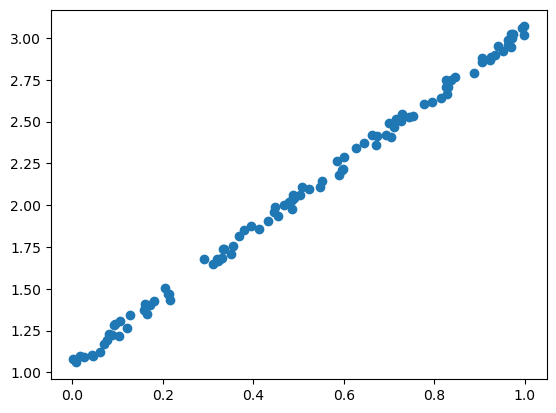

In [88]:
import matplotlib.pyplot as plt

plt.scatter(x,y)


# spli test-val and plot

In [89]:
np.arange(N)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [90]:
indx = np.arange(N)
np.random.shuffle(indx)

indx

array([51, 62, 27,  2, 76,  7, 54, 64, 67, 44, 14, 84, 90, 20, 59, 58, 21,
       55, 50, 28, 47, 12, 60, 96, 39, 85, 11,  4, 86, 52, 49, 79, 15, 43,
       35, 97,  3, 19, 57,  8, 42, 80, 69, 29, 87, 30,  0, 66, 94, 77,  1,
       31, 63, 25, 75, 95, 81, 17, 36, 32, 37, 46, 56, 38, 82, 33, 22, 16,
       65,  6, 23, 26, 53, 99, 70,  5, 83, 13, 48, 73, 93, 91, 78, 89, 92,
       88, 18, 45, 10, 71, 68, 40, 24, 98, 61, 34, 41, 72, 74,  9])

In [91]:
x_train = x[indx[:round(N*0.8)]]
y_train = y[indx[:round(N*0.8)]]

x_val = x[indx[round(N*0.8):]]
y_val = y[indx[round(N*0.8):]]




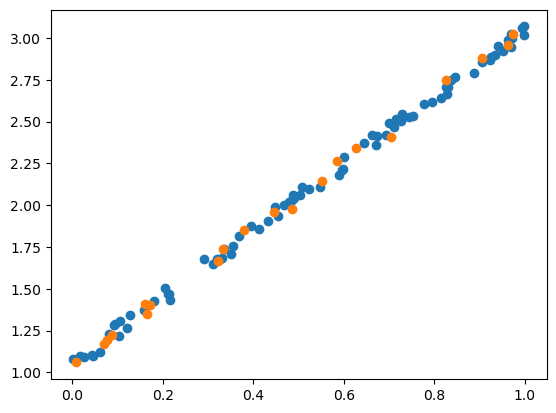

In [92]:
import matplotlib.pyplot as plt

plt.scatter(x_train,y_train, label='train')
plt.scatter(x_val,y_val, label='val')

# Manual regression

In [21]:
w,b = np.random.rand(1), np.random.rand(1)

print(b,w)

[0.50076332] [0.86952669]


regress using MSE

In [61]:
np.random.seed(42)

alpha = 0.1
w,b = np.random.rand(1), np.random.rand(1)
loss_list = []

for epoch in range(0, 10000):
    yhat = w*x_train +b
    err = (yhat - y_train)
    
    loss = (err**2).mean()
    

    db = 2*err.mean()
    dw = 2* (x_train*err).mean()
    
    
    loss_list.append((epoch, loss))

    b = b - alpha*db
    w = w - alpha*dw
    # break

print( b, w)
    

    

[1.05123868] [0.99767966]


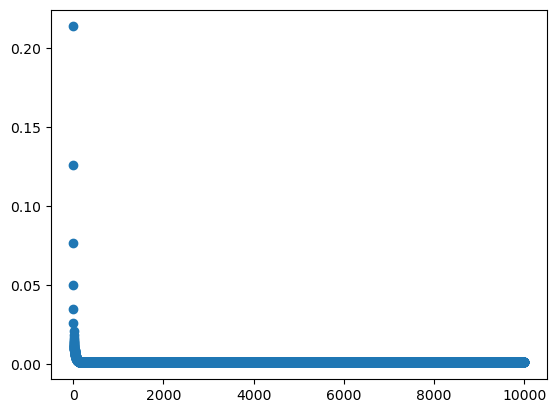

In [68]:
e,l  = zip(*loss_list)

plt.scatter(e,l, label='loss')

# Regression with pytorch

In [76]:
import torch

np.random.rand(42)
torch.manual_seed(42)

N=10000
device = 'cude' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)

lr=0.01

model = torch.nn.Sequential(torch.nn.Linear(1,1)).to(device)
optimiser = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss(reduction='mean')

for epoch in range(0, N):
    model.train()

    yhat = model(x_train_tensor)

    loss = loss_fn(yhat, y_train_tensor)

    loss.backward()

    optimiser.step()
    optimiser.zero_grad()

print(model.state_dict())

OrderedDict([('0.weight', tensor([[0.9976]])), ('0.bias', tensor([1.0513]))])


# Incapsulate steps

In [94]:
%run -i data_preparation.py
%run -i model_configuration.py
%run -i model_training.py

model.state_dict()

Done 'data_preparation.py'
Done 'model_configuration.py'
Done 'model_training.py'


OrderedDict([('0.weight', tensor([[1.9953]])), ('0.bias', tensor([1.0535]))])

In [103]:
type(loss), loss

(torch.Tensor, tensor(0.0008, grad_fn=<MseLossBackward0>))

In [106]:
type(loss.item()), loss.item()

(float, 0.0008289292454719543)

In [102]:
type(optimizer),optimizer

(torch.optim.sgd.SGD,
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [104]:
type(model), model

(torch.nn.modules.container.Sequential,
 Sequential(
   (0): Linear(in_features=1, out_features=1, bias=True)
 ))

In [107]:
%run -i data_preparation.py
%run -i model_configuration.py
%run -i model_training.py

model.state_dict()

Done 'data_preparation.py'
Done 'model_configuration.py'
Done 'model_training.py'


OrderedDict([('0.weight', tensor([[1.9953]])), ('0.bias', tensor([1.0535]))])

In [110]:
x_train_tensor[0] # will be on gpu if you have one

tensor([0.3551])

# Custom dataset

In [108]:
from torch.utils.data import Dataset, TensorDataset, DataLoader

In [117]:
"""
tuple of pairs (features, y)
"""
class CustomDataset(Dataset):
    """
    This is manual rewrite of TensorDataset
    """
    
    def __init__(self, x_tensor: torch.Tensor, y_tensor: torch.Tensor):
        self.x = x_tensor
        self.y = y_tensor

    def __getitem__(self, index):
        """has to be implemented"""
        return (self.x[index], self.y[index])
        
    def __len__(self):
        """has to be implemented"""
        return len(self.x)


x_train_tensor = torch.as_tensor(x_train).float()  # is on cpu
y_train_tensor = torch.as_tensor(y_train).float()  # is on cpu

train_dataset = CustomDataset(x_train_tensor, y_train_tensor)

train_dataset, train_dataset[0], (x_train[0], y_train[0])

(<__main__.CustomDataset at 0x13459f1d0>,
 (tensor([0.3551]), tensor([1.7547])),
 (array([0.35511247]), array([1.75473108])))

In [119]:
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_dataset, train_dataset[0], (x_train[0], y_train[0])

(<torch.utils.data.dataset.TensorDataset at 0x13459efd0>,
 (tensor([0.3551]), tensor([1.7547])),
 (array([0.35511247]), array([1.75473108])))

In [153]:
"""
iterator over dataset
"""

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True,
    drop_last=False, # what to do with incomplete batch   
    # num_workers=?, 
    # sampler=?,
    # generator=?,
)


In [161]:
y_train_tensor[0]

tensor([1.7547])

In [160]:
next(zip(x_train_tensor, y_train_tensor))

(tensor([0.3551]), tensor([1.7547]))

In [129]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [130]:
batch_x_slice, batch_y_slice = next(iter(train_loader)) # returns features and targets

In [137]:
type(batch_x_slice), batch_x_slice.shape

(torch.Tensor, torch.Size([16, 1]))

In [15]:
len(list(train_loader)) # list with each element - a batch

50

In [19]:
%%time

# you have to load them manually one at a time or the changes on import won't be fetched

%run -i generate_data.py
%run -i data_preparation.py
%run -i model_configuration.py
%run -i model_training.py


Done 'generate_data.py'
Done 'data_preparation.py'
Done 'model_configuration.py'
Done 'model_training.py'
OrderedDict([('0.weight', tensor([[2.0024]])), ('0.bias', tensor([1.0513]))])
CPU times: user 4.5 s, sys: 166 ms, total: 4.67 s
Wall time: 4.72 s


In [41]:
%%time

# you have to load them manually one at a time or the changes on import won't be fetched

%run -i generate_data.py
%run -i data_preparation.py
%run -i model_configuration.py
%run -i model_training.py


Done 'generate_data.py'
Done 'data_preparation.py'
Done 'model_configuration.py'
Done 'model_training.py'
OrderedDict([('0.weight', tensor([[2.0009]])), ('0.bias', tensor([1.0442]))])
CPU times: user 5.46 s, sys: 176 ms, total: 5.64 s
Wall time: 5.66 s


In [85]:
%%time

# you have to load them manually one at a time or the changes on import won't be fetched

%run -i generate_data.py
%run -i data_preparation.py
test_variable=30
%run -i model_configuration.py
%run -i model_training.py

Done 'generate_data.py'
Done 'data_preparation.py'
Done 'model_configuration.py'
Done 'model_training.py'
OrderedDict([('0.weight', tensor([[2.0552]])), ('0.bias', tensor([0.9649]))])
CPU times: user 1.2 s, sys: 450 ms, total: 1.65 s
Wall time: 1.52 s


In [14]:
len(val_loader)

13

# Tensorboard

this is for metrics tracking

In [43]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [44]:
!mkdir runs

mkdir: runs: File exists


In [60]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs/test')

In [61]:
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [62]:
dummy_x, dummy_y = next(iter(train_loader))

In [65]:
# DAG
writer.add_graph(model, dummy_x.to(device))
# writer.close()

In [67]:
# Scalars
writer.add_scalars(
      main_tag='loss',
      tag_scalar_dict={'training': train_losses[0],
                       'validation': val_losses[0]},
      global_step=epoch
  )

In [77]:
# %tensorboard --logdir runs

In [90]:
%%time


%run -i data_generation_simple_linear_regression.py
%run -i data_preparation.py
%run -i model_configuration.py
%run -i model_training.py

Done 'model_configuration.py'
OrderedDict([('0.weight', tensor([[1.9690]])), ('0.bias', tensor([1.0235]))])
CPU times: user 89.4 ms, sys: 22.6 ms, total: 112 ms
Wall time: 118 ms


In [91]:
%%time


%run -i data_generation_simple_linear_regression.py
%run -i data_preparation.py
%run -i model_configuration.py
%run -i model_training.py
    

Done 'data_preparation.py'
Done 'model_configuration.py'
Done 'model_training.py'
OrderedDict([('0.weight', tensor([[1.9769]])), ('0.bias', tensor([1.0097]))])
CPU times: user 277 ms, sys: 115 ms, total: 393 ms
Wall time: 364 ms


# Save/load checkpoint

In [31]:
# Save checkpoin 
checkpoint = {
    'epoch': n_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': train_losses,
    'val_loss': val_losses,
}
torch.save(checkpoint, 'model_checkpoint.pth')

In [32]:
!ls

CH1-2.ipynb            generate_data.py       model_training.py
__pycache__            model_checkpoint.pth   runs
data_preparation.py    model_configuration.py utils.py


In [34]:
# Load checkpoint
checkpoint = torch.load('model_checkpoint.pth')
type(checkpoint), checkpoint

(dict,
 {'epoch': 1000,
  'model_state_dict': OrderedDict([('0.weight', tensor([[1.9976]])),
               ('0.bias', tensor([1.0550]))]),
  'optimizer_state_dict': {'state': {0: {'momentum_buffer': None},
    1: {'momentum_buffer': None}},
   'param_groups': [{'lr': 0.1,
     'momentum': 0,
     'dampening': 0,
     'weight_decay': 0,
     'nesterov': False,
     'maximize': False,
     'foreach': None,
     'differentiable': False,
     'params': [0, 1]}]},
  'loss': [0.07170617872849107,
   0.010352750746533275,
   0.0034042100212536754,
   0.0015193182055372745,
   0.0010152796283364296,
   0.000881212264066562,
   0.0008516094775404781,
   0.000835685845813714,
   0.0008338850282598286,
   0.0008324175782036036,
   0.0008296954992692918,
   0.0008407135808374733,
   0.0008296404691645876,
   0.0008331829262897372,
   0.0008397194009739906,
   0.0008330705098342151,
   0.0008319227979518473,
   0.0008335972111672162,
   0.0008358361723367125,
   0.0008312895620474592,
   0.0008349

In [38]:
# %run -i generate_data.py
# %run -i data_preparation.py
# %run -i model_configuration.py


model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

%run -i model_configuration.py

Done 'model_configuration.py'


In [42]:
# predict
new_inputs = torch.tensor([[0.2], [0.34], [0.57]])

model.eval()
model(new_inputs.to(device))

tensor([[1.4444],
        [1.7246],
        [2.1848]], grad_fn=<AddmmBackward0>)